## **To mosaic tiff files that uses a huge ram make sure you have enough**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mount and set to current directory

In [2]:
import os
os.chdir('/content/drive/MyDrive/Myanmar')
print(os.getcwd())

/content/drive/MyDrive/Myanmar


In [3]:
!ls

Mosaic					Myanmar_2012-0000000000-0000000000.tif
Myanmar_2000-0000000000-0000000000.tif	Myanmar_2012-0000065536-0000000000.tif
Myanmar_2000-0000065536-0000000000.tif	Myanmar_2013-0000000000-0000000000.tif
Myanmar_2001-0000000000-0000000000.tif	Myanmar_2013-0000065536-0000000000.tif
Myanmar_2001-0000065536-0000000000.tif	Myanmar_2014-0000000000-0000000000.tif
Myanmar_2002-0000000000-0000000000.tif	Myanmar_2014-0000065536-0000000000.tif
Myanmar_2002-0000065536-0000000000.tif	Myanmar_2015-0000000000-0000000000.tif
Myanmar_2003-0000000000-0000000000.tif	Myanmar_2015-0000065536-0000000000.tif
Myanmar_2003-0000065536-0000000000.tif	Myanmar_2016-0000000000-0000000000.tif
Myanmar_2004-0000000000-0000000000.tif	Myanmar_2016-0000065536-0000000000.tif
Myanmar_2004-0000065536-0000000000.tif	Myanmar_2017-0000000000-0000000000.tif
Myanmar_2005-0000000000-0000000000.tif	Myanmar_2017-0000065536-0000000000.tif
Myanmar_2005-0000065536-0000000000.tif	Myanmar_2018-0000000000-0000000000.tif
Myanmar_2006-0

## To install necessary package

In [4]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.6 MB/s eta 0:00:00


In [5]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob

## This is to read only specific name such as year 🥰

In [6]:
# Specific year to filter
specific_year = '2002'

# Define the directory containing your TIFF images
inference_dir = '/content/drive/MyDrive/Myanmar/'
output_dir = '/content/drive/MyDrive/Myanmar/Mosaic/'
output_path = os.path.join(output_dir, f'Myanmar_{specific_year}.tif')  # Complete file path for saving the mosaic
print(output_path)

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory at {output_dir}")


# Fetch all TIFF files in the directory
tiff_files = glob.glob(os.path.join(inference_dir, '*.tif'))

# Filter files containing the specific year
tiff_files = [file for file in tiff_files if f'Myanmar_{specific_year}' in os.path.basename(file)]

# Open all TIFF files as datasets
datasets = []
for tiff in tiff_files:
    src = rasterio.open(tiff)
    datasets.append(src)
print(datasets[0:2])
# Merge all TIFF files into a single mosaic
mosaic, transform = merge(datasets)

# Get the metadata of the first file and update it for the mosaic
out_meta = datasets[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": transform
})

# Save the mosaic as a new TIFF file
with rasterio.open(output_path, "w", **out_meta) as dest:
    dest.write(mosaic)

print(f'Mosaic saved to {output_path}')

/content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2002.tif
[<open DatasetReader name='/content/drive/MyDrive/Myanmar/Myanmar_2002-0000000000-0000000000.tif' mode='r'>, <open DatasetReader name='/content/drive/MyDrive/Myanmar/Myanmar_2002-0000065536-0000000000.tif' mode='r'>]
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2002.tif


## Iteration code

In [ ]:
import os
import glob
import rasterio
from rasterio.merge import merge

# Define the directories
inference_dir = '/content/drive/MyDrive/Myanmar/'
output_dir = '/content/drive/MyDrive/Myanmar/Mosaic/'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory at {output_dir}")

# Iterate over years from 2000 to 2023
for year in range(2003, 2024):
    specific_year = str(year)
    output_path = os.path.join(output_dir, f'Myanmar_{specific_year}.tif')  # Output file path

    # Fetch all TIFF files for the specific year
    tiff_files = glob.glob(os.path.join(inference_dir, '*.tif'))
    tiff_files = [file for file in tiff_files if f'Myanmar_{specific_year}' in os.path.basename(file)]

    if not tiff_files:
        print(f"No files found for the year {specific_year}. Skipping...")
        continue

    # Open all TIFF files as datasets
    datasets = [rasterio.open(tiff) for tiff in tiff_files]

    # Merge all TIFF files into a single mosaic
    mosaic, transform = merge(datasets)

    # Get metadata from the first file and update it for the mosaic
    out_meta = datasets[0].meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": transform
    })

    # Save the mosaic as a new TIFF file
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)

    print(f"Mosaic saved to {output_path}")

# All years processed
print("Yearly mosaics generation completed!")


Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2003.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2004.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2005.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2006.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2007.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2008.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2009.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2010.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2011.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2012.tif
Mosaic saved to /content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2013.tif


## Visualization 🏖

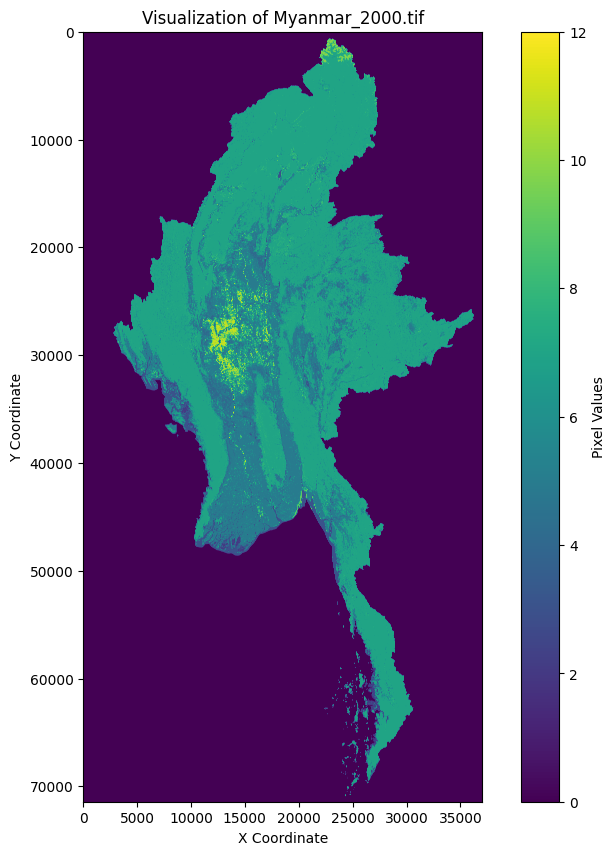

In [7]:
import rasterio
import matplotlib.pyplot as plt

# File path to the TIFF file
tiff_file = '/content/drive/MyDrive/Myanmar/Mosaic/Myanmar_2000.tif'

# Open the TIFF file using rasterio
with rasterio.open(tiff_file) as src:
    # Read the data (first band for single-band data or RGB for multi-band)
    data = src.read(1)  # For multi-band, use src.read([1, 2, 3]) for RGB visualization
    cmap = 'viridis' if src.count == 1 else None  # Choose a colormap for single-band

    # Plot the data
    plt.figure(figsize=(10, 10))
    plt.title(f"Visualization of {tiff_file.split('/')[-1]}")
    plt.imshow(data, cmap=cmap)
    plt.colorbar(label='Pixel Values')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(False)
    plt.show()
